# Dataset_Diabetes ✏️

Análise descritiva e Inferencial



## Dicionário: 📖

1.   Gravidez: Para expressar o número de gestações
2.   Glicose: Para expressar o nível de glicose no sangue
1.   Pressão Arterial: Para expressar a medição da pressão arterial
2.   Insulina: Para expressar o nível de insulina no sangue
1.   IMC: Para expressar o índice de massa corporal
2.   Idade: Para expressar a idade
1.   Diabetes: Para expressar o status da diabetes (SIM ou NÃO)


# Processo de Extração dos dados


### Importando as bibliotecas necessárias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import scipy.stats as ss

### Indenticando o encoding

In [ ]:
import chardet
with open('Saude_Diabetes.csv', 'rb') as f:
      data = f.read()

      enconding_result = chardet.detect(data)
      encoding = enconding_result ['encoding']
      print("Detected Encoding:", encoding)

Detected Encoding: ISO-8859-1


### Organizando a Tabela nas colunas de acordo com o encoding e separador

In [ ]:
dados = pd.read_csv('Saude_Diabetes.csv', encoding= 'ISO-8859-1', sep=';')

### Verificando as 5 primeiras linhas                                
------------------------------------------------------------------
#### (Verificando se as colunas estão organizadas na forma correta)

In [ ]:
dados.head(5)

,Gravidez,Glicose,Pressao,Insulina,IMC,Idade,Diabetes
0,6,148,72,0,33.6,50,Sim
1,1,85,66,0,26.6,31,Não
2,8,183,64,0,23.3,32,Sim
3,1,89,66,94,28.1,21,Não
4,0,137,40,168,43.1,33,Sim


### Renomear valores 0 em colunas específicas para NAN

In [ ]:
dados[['Glicose', 'Pressao', 'Insulina', 'IMC']] = dados[['Glicose', 'Pressao', 'Insulina', 'IMC']].replace(0, np.nan)

In [ ]:
dados.head(5)

,Gravidez,Glicose,Pressao,Insulina,IMC,Idade,Diabetes
0,6,148.0,72.0,NaN,33.6,50,Sim
1,1,85.0,66.0,NaN,26.6,31,Não
2,8,183.0,64.0,NaN,23.3,32,Sim
3,1,89.0,66.0,94.0,28.1,21,Não
4,0,137.0,40.0,168.0,43.1,33,Sim


### Observando os tipos de dados e outras informações


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gravidez  2460 non-null   int64  
 1   Glicose   2443 non-null   float64
 2   Pressao   2346 non-null   float64
 3   Insulina  1279 non-null   float64
 4   IMC       2429 non-null   float64
 5   Idade     2460 non-null   int64  
 6   Diabetes  2460 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 134.7+ KB


💡 Foram identificados valores não correspondentes com o número total das colunas sendo NAN ou Null, os tipos dos dados estão corretos. Tamanho do Dataset: 2460 linhas e 7 colunas.



## Verificando quantos NAN consta nas coluna com dados faltantes


In [ ]:
dados_nan = dados[['Glicose', 'Pressao', 'Insulina', 'IMC']].isnull().sum()

print(dados_nan)

Glicose       17
Pressao      114
Insulina    1181
IMC           31
dtype: int64


# Cópia do Dado para manipulação


In [ ]:
df_c = dados.copy()
df_c.shape

df_c.head(10)

,Gravidez,Glicose,Pressao,Insulina,IMC,Idade,Diabetes
0,6,148.0,72.0,NaN,33.6,50,Sim
1,1,85.0,66.0,NaN,26.6,31,Não
2,8,183.0,64.0,NaN,23.3,32,Sim
3,1,89.0,66.0,94.0,28.1,21,Não
4,0,137.0,40.0,168.0,43.1,33,Sim
5,5,116.0,74.0,NaN,25.6,30,Não
6,3,78.0,50.0,88.0,31.0,26,Sim
7,10,115.0,NaN,NaN,35.3,29,Não
8,2,197.0,70.0,543.0,30.5,53,Sim
9,8,125.0,96.0,NaN,NaN,54,Sim


# Análises 🤓📈


## Dados numéricos

In [ ]:
round(df_c.describe(),2)

,Gravidez,Glicose,Pressao,Insulina,IMC,Idade
count,2460.00,2443.00,2346.00,1279.00,2429.00,2460.00
mean,3.82,122.45,72.26,154.10,32.40,32.82
std,3.30,30.23,11.82,121.75,6.96,11.25
min,0.00,44.00,30.00,14.00,18.20,21.00
25%,1.00,100.00,64.00,73.00,27.30,24.00
50%,3.00,117.00,72.00,120.00,32.30,29.00
75%,6.00,142.00,80.00,192.00,36.60,39.00
max,17.00,197.00,122.00,846.00,67.10,81.00


## Dados categóricos

In [ ]:
dados[['Diabetes']].describe()

,Diabetes
count,2460
unique,2
top,Não
freq,1500


## Verificando a Variância

In [ ]:
variancia = df_c[['Gravidez', 'Glicose', 'Pressao', 'Insulina', 'IMC', 'Idade']].var()
variancia_r= variancia.round(2)

display(variancia_r)

,0
Gravidez,10.87
Glicose,913.94
Pressao,139.75
Insulina,14824.22
IMC,48.42
Idade,126.59


## Construção de Gráficos
--------------------------
* Sendo Diabetes meu resultado. Precisamos responder as seguintes perguntas:
1. Quantos entrevistados possuem diabetes e quantos não possuem?
2. A pressao tem relação com casos de diabetes?
3. As mulheres com mais gestação possuem mais chances de ter diabetes?
4. O peso influencia no desenvolvimento da diabetes?
5. A relação da Insulina com a glicose podem favorecer a dibetes?
6. A idade é um fator para aumento da insulina e glicose?
7. A gestação influencia nos níveis de glicose e insulina?




### Quantos entrevistados possuem diabetes e quantos não possuem

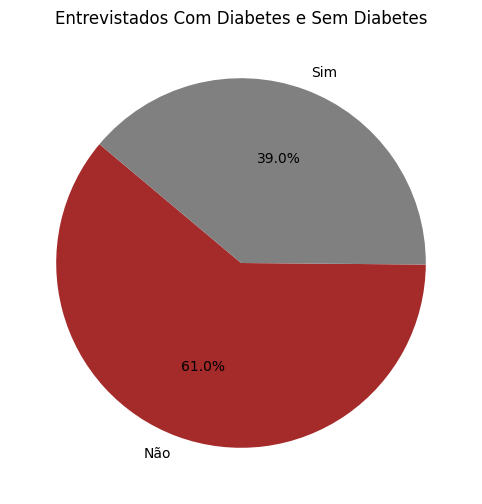

In [ ]:
diabetes_counts = df_c['Diabetes'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140, colors=['brown','gray'])
plt.title('Entrevistados Com Diabetes e Sem Diabetes')

plt.show()

💡 Mulheres com glicoses no intervalo de 100-125 que são **pré-diabéticas** estão juntas ao grupo de mulheres com valores de glicose considerado saudável por isso essa discrepancia nos dados. seria interessante uma divisão mais detalhada.

## Destrinchando um pouco mais os dados de Diabetes
-----------
Seria interessante uma divisão que separesse as mulheres saudaveis das pré-diabéticas. Vamos conhecer esses dados

In [ ]:
# Filtrar pessoas com glicose acima de 100 e abaixo de 125
pessoas_glicose_intervalo1 = dados[(dados['Glicose'] > 100) & (dados['Glicose'] < 125)]
quantidade1 = pessoas_glicose_intervalo1.shape[0]

print(f'Quantidade de pessoas com glicose entre 100 e 125: {quantidade1}')

Quantidade de pessoas com glicose entre 100 e 125: 819


In [ ]:
# Filtrar pessoas com glicose acima de 100 e abaixo de 125
pessoas_glicose_intervalo2 = dados[(dados['Glicose'] <= 100)]
quantidade2 = pessoas_glicose_intervalo2.shape[0]

print(f'Quantidade de pessoas com glicose menor ou igual a 100: {quantidade2}')

Quantidade de pessoas com glicose menor ou igual a 100: 614


In [ ]:
# Filtrar pessoas com glicose acima de 100 e abaixo de 125
pessoas_glicose_intervalo2s = dados[(dados['Glicose'] > 125)]
quantidade2s = pessoas_glicose_intervalo2s.shape[0]

print(f'Quantidade de pessoas com glicose maior que 125: {quantidade2s}')

Quantidade de pessoas com glicose maior que 125: 966


💡Para futuras pesquisas poderiamos separar cada grupo desse em colunas distintas e fazer novas analises

### Verificando se a pressão tem relação com a diabetes

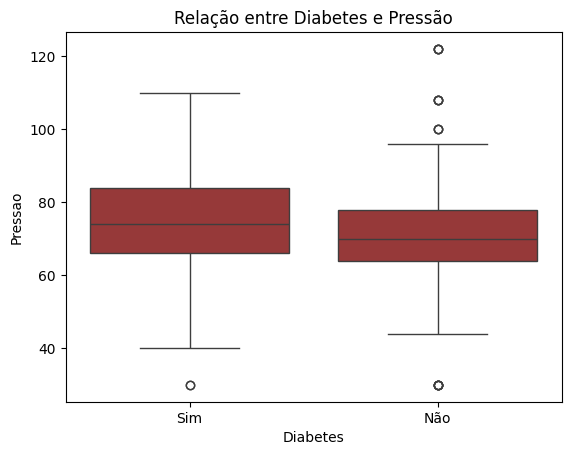

In [ ]:
sns.boxplot(x='Diabetes', y='Pressao', data=dados, color='brown')
plt.title('Relação entre Diabetes e Pressão')

plt.show()

💡Pessoas com diabetes parecem ter valores de pressão arterial, com um intervalo maior entre o mínimo e o máximo. O grupo sem diabetes tem alguns outliers de alta pressão mais evidentes, mas sua faixa geral de pressão parece ser mais compacta. A mediana da pressão é levemente maior no grupo com diabetes em comparação ao grupo sem diabetes o que não chega a ser conclusivo sobre a atuação na pressão sobre a presença da diabetes.


## Analisando se o número de gestação pode influenciar a diabetes

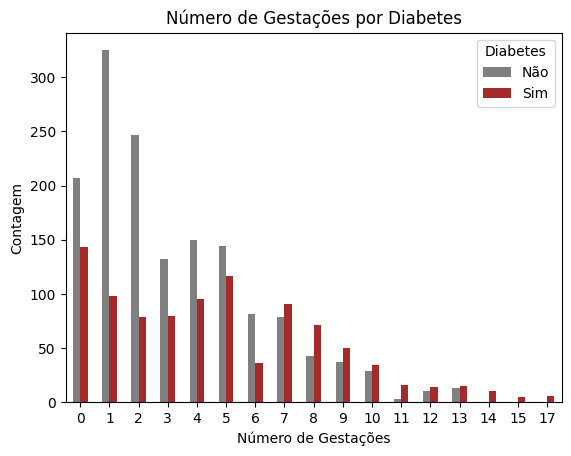

In [ ]:
contagem = df_c.groupby(['Gravidez', 'Diabetes']).size().unstack(fill_value=0)

contagem.plot(kind='bar', color=['gray', 'brown'])

plt.title('Número de Gestações por Diabetes')
plt.xlabel('Número de Gestações')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.legend(title='Diabetes', labels=['Não', 'Sim'])

plt.show()

💡Valores de diabéticos aumenta após 6º gestação.Pode está relacionada a probabilidade maior de adquirir diabetes gestacional ou outros fatores como o aumento de peso. Mas será que a idade tem relação no número de gestações e diabetes?

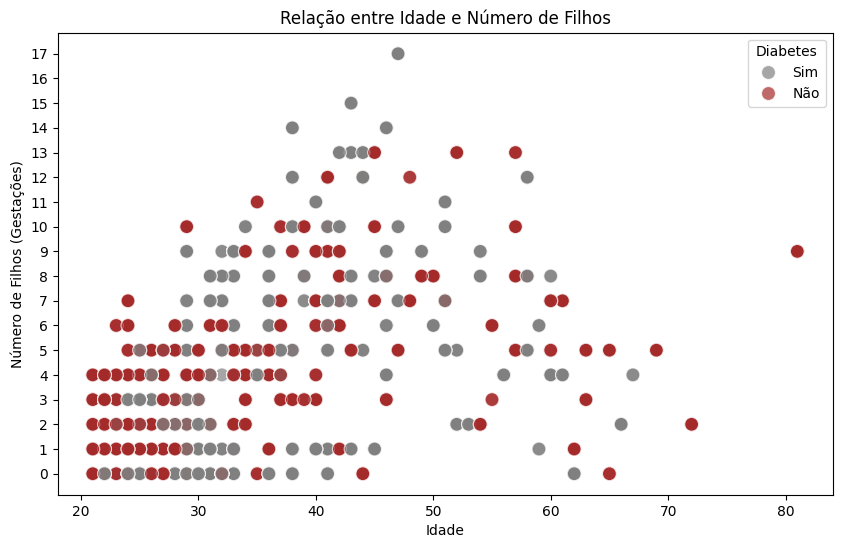

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='Gravidez', data=df_c, hue='Diabetes', palette={'Sim':'gray', 'Não':'brown'}, s=100, alpha=0.7)


plt.title('Relação entre Idade e Número de Filhos')
plt.xlabel('Idade')
plt.ylabel('Número de Filhos (Gestações)')

plt.yticks(range(0, df_c['Gravidez'].max() + 1)) #Deixar o número inteiro

plt.show()

💡Não se observa uma estruturação muito clara quanto a diabéticos e não diabéticos relacionado a idade e gestação. Se observa uma concentração de entrevistadas com idades abaixo dos 50 anos. Qual será a idade mais trabalhada nesse estudo?


### Construção de Histogramas

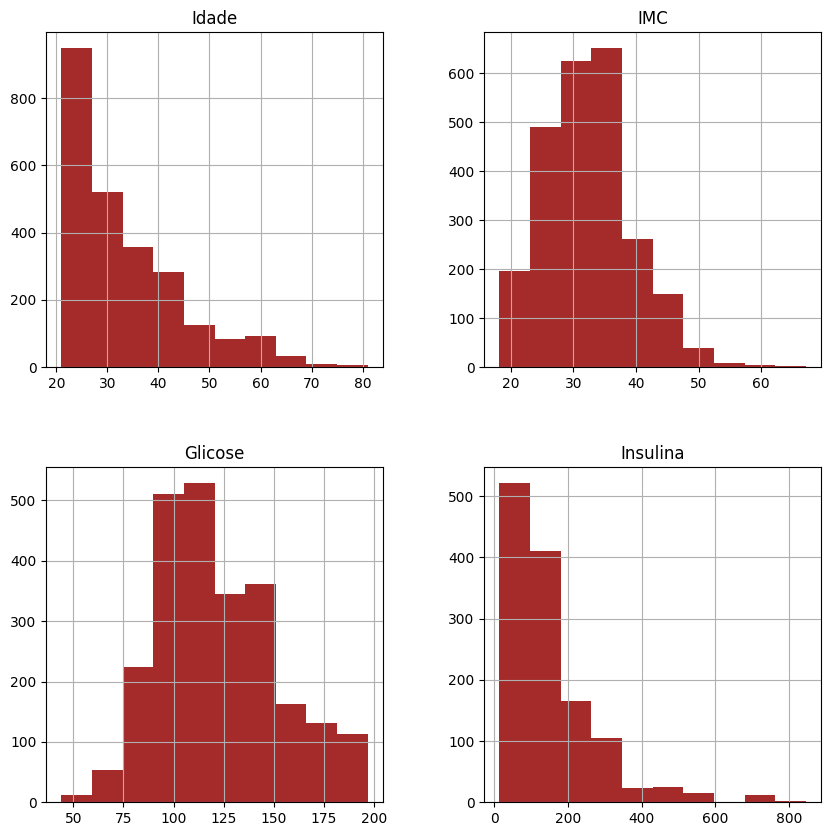

In [ ]:
dados[['Idade','IMC','Glicose', 'Insulina']].hist(figsize=(10,10), color='brown')

plt.show()

💡É possível observar pelo histograma que a maior parte das entrevistadas nesse estudo estão na faixa dos 21-25 anos, representando mais de 36% dos entrevistados. Após os 40 anos o número de entrevistados cai para >= 100 pessoas.

## Verificando se a idade tem relação com a Diabetes

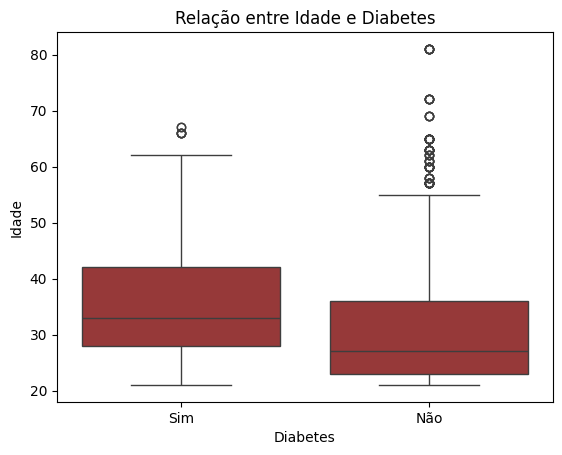

In [ ]:
sns.boxplot(x='Diabetes', y='Idade', data=dados, color='brown')
plt.title('Relação entre Idade e Diabetes')

plt.show()

💡A idade mediana é um pouco mais alta para pessoas com diabetes.
No entanto, o grupo sem diabetes contém mais outliers, indicando que há mais pessoas sem diabetes em idades mais avançadas, acima de 60 anos.


## Verificando se o IMC (Índice de Massa Corpórea) tem relação com a Diabetes

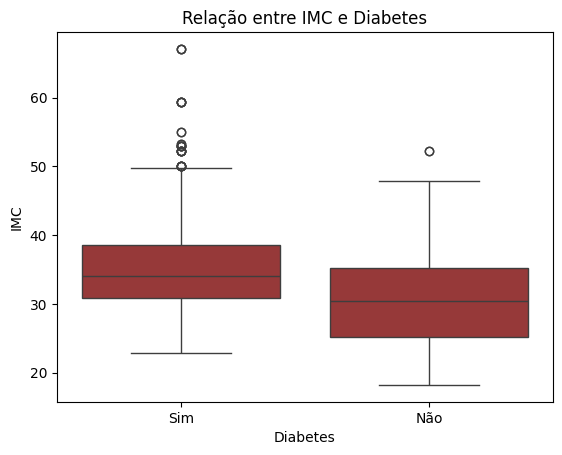

In [ ]:
sns.boxplot(x='Diabetes', y='IMC', data=dados, color='brown')
plt.title('Relação entre IMC e Diabetes')

plt.show()

💡O gráfico indica que pessoas com diabetes tendem a ter IMCs mais altos e mais casos de obesidade severa (refletidos pelos outliers), enquanto o grupo sem diabetes tem uma distribuição mais compacta e com menos valores extremos de IMC.

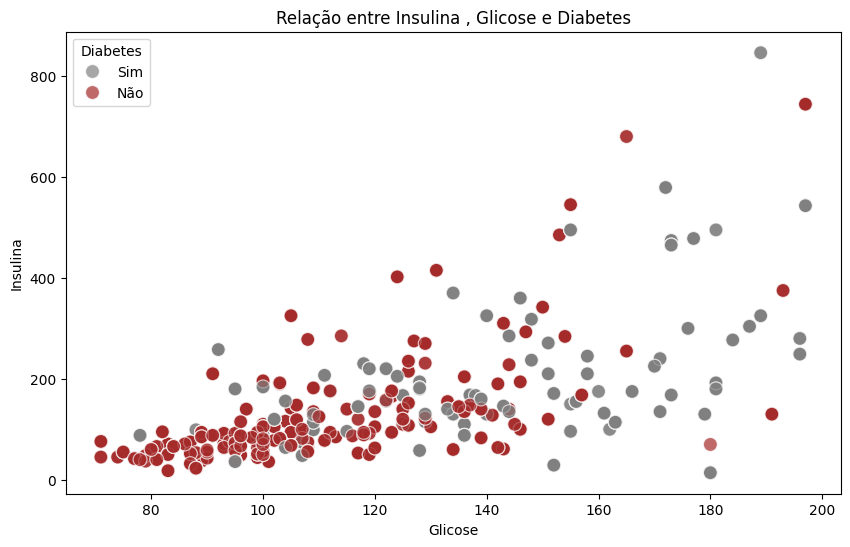

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glicose', y='Insulina', data=df_c, hue='Diabetes', palette={'Sim':'gray', 'Não':'brown'}, s=100, alpha=0.7)

plt.title('Relação entre Insulina , Glicose e Diabetes')
plt.xlabel('Glicose')
plt.ylabel('Insulina')

plt.show()

💡 Conseguimos observar uma leve separação dos diabeticos dos não diabeticos a medida que os níveis de glicose vão subindo e os de insulina também, para compensar o aumento da glicose. Porém será que temos Correlação entre esses dados?

## Verificando Correlação entre as variáveis trabalhadas 🤓
------
💡 Transformando o tipo da variável Diabetes para numérico (binário) para que possa ser usado nas análises de correlação

In [ ]:
df_c['Diabetes'] = df_c['Diabetes'].replace({'Sim': 1, 'Não': 0})


df_c.head(5)

<ipython-input-148-81de247df285>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c['Diabetes'] = df_c['Diabetes'].replace({'Sim': 1, 'Não': 0})


,Gravidez,Glicose,Pressao,Insulina,IMC,Idade,Diabetes
0,6,148.0,72.0,NaN,33.6,50,1
1,1,85.0,66.0,NaN,26.6,31,0
2,8,183.0,64.0,NaN,23.3,32,1
3,1,89.0,66.0,94.0,28.1,21,0
4,0,137.0,40.0,168.0,43.1,33,1


## Verificando a Correlação pelo método Spearman
------
💡Usado quando:

* Os dados não são normalmente distribuídos.
* A relação entre as variáveis não precisa ser linear.
* As variáveis são ordinais ou possuem muitos outliers.

In [ ]:
df_c[['Idade','Gravidez','Glicose','Pressao', 'Insulina', 'IMC', 'Diabetes']].corr(method='spearman')

,Idade,Gravidez,Glicose,Pressao,Insulina,IMC,Diabetes
Idade,1.000000,0.621525,0.310849,0.350918,0.348402,0.161886,0.297577
Gravidez,0.621525,1.000000,0.179923,0.188025,0.200809,0.090350,0.188742
Glicose,0.310849,0.179923,1.000000,0.230217,0.667329,0.265462,0.453897
Pressao,0.350918,0.188025,0.230217,1.000000,0.157276,0.341913,0.185569
Insulina,0.348402,0.200809,0.667329,0.157276,1.000000,0.387253,0.384211
IMC,0.161886,0.090350,0.265462,0.341913,0.387253,1.000000,0.314265
Diabetes,0.297577,0.188742,0.453897,0.185569,0.384211,0.314265,1.000000


💡 Maiores valores de correlação identificados entre:
 * Glicose e insulina 0.66 <br>
 * Gravidez e Idade 0.62 <br>
 * Diabetes e Glicose 0.45 <br>

💡 Menores Valores de correlação identificados entre:
* IMC e Gravidez 0.09 <br>
* Insulina e Pressao 0.15 <br>
* IMC e Idade 0.16 <br>
* Glicose e Gravidez 0.17 <br>
* Pressão e Gravidez 0.18 <br>


### Teste de Hipótese
----------
💡 Usamos o test de man-whitney, teste não paramêtrico para dados não normalizados.

H0: Níveis de glicose dos diabéticos são iguais ou menores que os dos não diabéticos.

H1: Níveis de glicose dos diabéticos são maiores que os dos não diabéticos.

## Limpeza da coluna Glicose para o teste
----
💡Campos não númericos atrapalham os testes estatísticos e dão erros

### Apagando dados NAN de Glicose

In [ ]:
df_c = df_c.dropna(subset=['Glicose'])

### Verificando se os dados NAN foram retirados com sucesso

In [ ]:
nan_glicose = df_c['Glicose'].isnull().sum()

print(f"Quantidade de valores NaN na coluna Glicose: {nan_glicose}")

Quantidade de valores NaN na coluna Glicose: 0


In [ ]:
# Supondo que df_c já esteja definido
diabetico = df_c[df_c['Diabetes'] == 1]  # Presença de diabetes
nao_diabetico = df_c[df_c['Diabetes'] == 0]  # Ausência de diabetes

# Realizando o teste de Mann-Whitney U
estatistica, p_valor = stats.mannwhitneyu(diabetico['Glicose'], nao_diabetico['Glicose'], alternative='greater')

# Imprimindo o p-valor
print(f"P-valor: {p_valor}")



P-valor: 1.0026385155613311e-111


In [ ]:
alpha = 0.05 #Nível de significancia

if p_valor <= alpha:
    print("Rejeito a H0: Os diabéticos têm, em média, níveis de glicose maiores que os não diabéticos.")
else:
    print("Não rejeito a H0: Não há evidências suficientes para dizer que os diabéticos têm níveis de glicose maiores.")

Rejeito a H0: Os diabéticos têm, em média, níveis de glicose maiores que os não diabéticos.


## Pós Tratamentos para Exportar Arquivo ✈️

## Transformando o ponto em vírgula - padrão BR


Para o Power BI com configurações regionais brasileiras, os números com ponto podem ser mal interpretados.

In [ ]:
df_c['IMC'] = df_c['IMC'].astype(str).str.replace('.', ',', regex=False)
df_c['Glicose'] = df_c['Glicose'].astype(str).str.replace('.', ',', regex=False)
df_c['Pressao'] = df_c['Pressao'].astype(str).str.replace('.', ',', regex=False)
df_c['Insulina'] = df_c['Insulina'].astype(str).str.replace('.', ',', regex=False)


df_c.head(5)

,Gravidez,Glicose,Pressao,Insulina,IMC,Idade,Diabetes
0,6,"148,0","72,0",nan,"33,6",50,Sim
1,1,"85,0","66,0",nan,"26,6",31,Não
2,8,"183,0","64,0",nan,"23,3",32,Sim
3,1,"89,0","66,0","94,0","28,1",21,Não
4,0,"137,0","40,0","168,0","43,1",33,Sim


### Transformando arquivo em parquet 🟩

Arquivo no formato mais leve para exportar


In [ ]:
df_c.to_parquet('dados_Diabetes.parquet')